In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv('../../datasets/data_banknote_authentication.csv')
pd.set_option('display.max_columns', None)

df.head(2)

,variance,skewness,curtosis,entropy,class
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.46210,0


| Feature      | What it measures                 | Typical in Genuine Notes        | Typical in Fake Notes            | Approx. Thresholds*                      |
| ------------ | -------------------------------- | ------------------------------- | -------------------------------- | ---------------------------------------- |
| **Variance** | Spread of pixel values (texture) | Moderate, positive              | Very low, negative, or extreme   | Genuine: 0.3 – 6.5<br>Fake: <0.3 or >6.5 |
| **Skewness** | Asymmetry of pixel distribution  | Positive, regular pattern       | Negative, near zero, or extreme  | Genuine: 0 – 12<br>Fake: <0 or >12       |
| **Curtosis** | Peakedness of pixel distribution | Slightly negative to small pos. | Large positive or very irregular | Genuine: -5 – 5<br>Fake: < -5 or >5      |
| **Entropy**  | Randomness/complexity            | Low/negative, predictable       | Very high or unusual randomness  | Genuine: -7 – 2<br>Fake: < -7 or >2      |


In [4]:
df.tail()

,variance,skewness,curtosis,entropy,class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


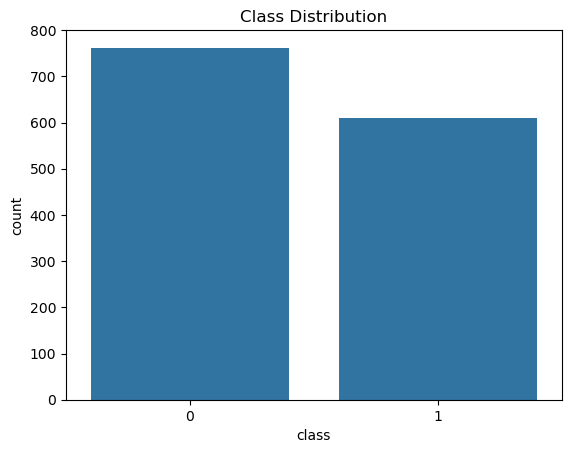

In [5]:
sns.countplot(x='class', data=df)
plt.title('Class Distribution')
plt.show()

In [6]:
Features = df[["variance", "skewness", "curtosis", "entropy"]]
Target = df["class"]

In [7]:
XTrain, XTest, YTrain, YTest = train_test_split(
    Features,
    Target,
    test_size=0.2,
    random_state=42,
    stratify=Target
)


Synthetic Minority Oversampling Technique

In [8]:
Smote = SMOTE(random_state = 42)
XTrainBalanced, YTrainBalanced = Smote.fit_resample(XTrain, YTrain)

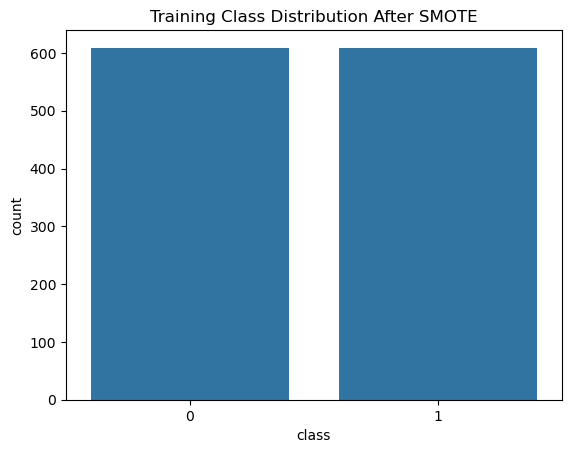

In [9]:
sns.countplot(x=YTrainBalanced)
plt.title("Training Class Distribution After SMOTE")
plt.show()


In [10]:
Scaler = StandardScaler()
XTrainScaled = Scaler.fit_transform(XTrainBalanced)
XTestScaled = Scaler.transform(XTest)

In [11]:
SvmClassifier = SVC(kernel="linear", random_state=42)
SvmClassifier.fit(XTrainScaled, YTrainBalanced)

SVC(kernel='linear', random_state=42)

In [ ]:
YPred = SvmClassifier.predict(XTestScaled)

In [13]:
ConfMatrix = confusion_matrix(YTest, YPred)

TN = ConfMatrix[0, 0]
FP = ConfMatrix[0, 1]
FN = ConfMatrix[1, 0]
TP = ConfMatrix[1, 1]

Accuracy = accuracy_score(YTest, YPred)
Precision = precision_score(YTest, YPred)
Recall = recall_score(YTest, YPred)
F1Score = f1_score(YTest, YPred)

MetricsTable = pd.DataFrame({
    "Metric": ["TP", "TN", "FP", "FN", "Accuracy", "Precision", "Recall", "F1 Score"],
    "Value": [TP, TN, FP, FN, Accuracy, Precision, Recall, F1Score]
})

MetricsTable

,Metric,Value
0,TP,122.000000
1,TN,146.000000
2,FP,7.000000
3,FN,0.000000
4,Accuracy,0.974545
5,Precision,0.945736
6,Recall,1.000000
7,F1 Score,0.972112


In [14]:
ConfMatrix

array([[146,   7],
       [  0, 122]])

      Metric       Value
0         TP  122.000000
1         TN  146.000000
2         FP    7.000000
3         FN    0.000000
4   Accuracy    0.974545
5  Precision    0.945736
6     Recall    1.000000
7   F1 Score    0.972112


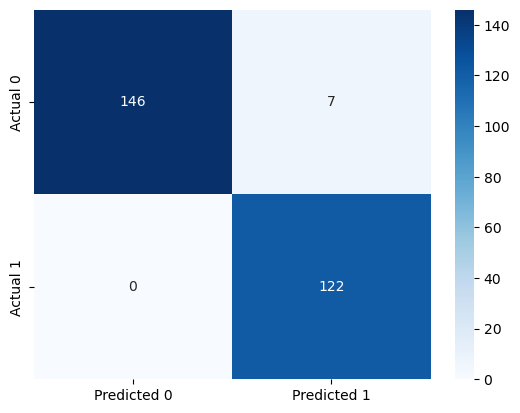

In [15]:
print(MetricsTable)
sns.heatmap(
    ConfMatrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Predicted 0", "Predicted 1"],
    yticklabels=["Actual 0", "Actual 1"]
)
plt.show()